In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers

2023-07-23 00:01:16.229194: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-23 00:01:17.279311: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/student1/miniconda3/envs/Accident_detection/lib/python3.9/site-packages/cv2/../../lib64:/home/student1/openssl/lib:
2023-07-23 00:01:17.279448: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/st

In [2]:
batch_size = 100
img_height = 250
img_width = 250

In [3]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/train',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/test',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    'data/val',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


2023-07-23 00:01:24.854876: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-23 00:01:25.602641: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10405 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:89:00.0, compute capability: 6.1


In [4]:
class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [5]:
img_shape = (img_height, img_width, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

In [6]:
model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(training_ds, validation_data = validation_ds, epochs = 10)

Epoch 1/10


2023-07-23 00:01:43.494770: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8200
2023-07-23 00:01:45.226086: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f0a78a59f00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-23 00:01:45.226162: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2023-07-23 00:01:45.238244: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-23 00:01:45.668073: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 [==============================] - 11s 382ms/step - loss: 0.9785 - accuracy: 0.5234 - val_loss: 0.6601 - val_accuracy: 0.6327
Epoch 2/10
8/8 [==============================] - 1s 147ms/step - loss: 0.6134 - accuracy: 0.6473 - val_loss: 0.5406 - val_accuracy: 0.7245
Epoch 3/10
8/8 [==============================] - 1s 147ms/step - loss: 0.4770 - accuracy: 0.7826 - val_loss: 0.5022 - val_accuracy: 0.7449
Epoch 4/10
8/8 [==============================] - 1s 147ms/step - loss: 0.3275 - accuracy: 0.8736 - val_loss: 0.4195 - val_accuracy: 0.8061
Epoch 5/10
8/8 [==============================] - 1s 145ms/step - loss: 0.2008 - accuracy: 0.9343 - val_loss: 0.2817 - val_accuracy: 0.8673
Epoch 6/10
8/8 [==============================] - 1s 146ms/step - loss: 0.1098 - accuracy: 0.9709 - val_loss: 0.2583 - val_accuracy: 0.8776
Epoch 7/10
8/8 [==============================] - 1s 147ms/step - loss: 0.0590 - accuracy: 0.9810 - val_loss: 0.3703 - val_accuracy: 0.8571
Epoch 8/10
8/8 [==============

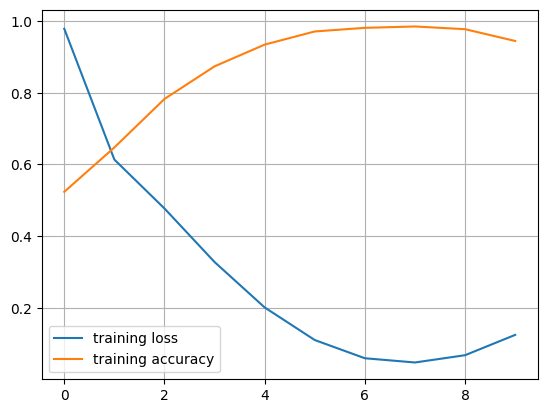

In [9]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

In [10]:
model.evaluate(testing_ds)

1/1 [==============================] - 0s 231ms/step - loss: 0.2437 - accuracy: 0.9000


[0.2437244951725006, 0.8999999761581421]